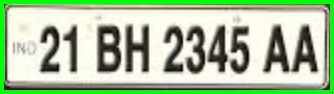

Detected Plate Text: | 24 BH 2345 AAI


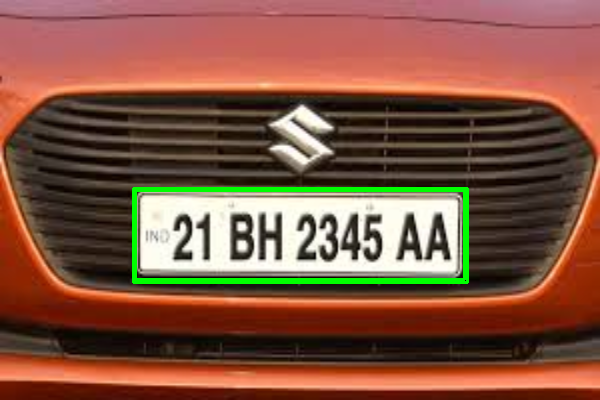

In [2]:
!pip install pytesseract
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

# Step 1: Load and resize image
img = cv2.imread('/content/sample_data/car.png')
img = cv2.resize(img, (600, 400))

# Step 2: Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Apply filtering and edge detection
blur = cv2.bilateralFilter(gray, 11, 17, 17)
edges = cv2.Canny(blur, 30, 200)

# Step 4: Find contours
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

plate_img = None
text = ""

# Step 5: Loop through contours to find number plate region
for c in contours:
    approx = cv2.approxPolyDP(c, 0.02 * cv2.arcLength(c, True), True)
    if len(approx) == 4:
        x, y, w, h = cv2.boundingRect(c)
        plate_img = img[y:y + h, x:x + w]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        break

# Step 6: OCR
if plate_img is not None:
    cv2_imshow(plate_img)
    gray_plate = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray_plate, 150, 255, cv2.THRESH_BINARY)
    text = pytesseract.image_to_string(thresh, config='--psm 7')
    print("Detected Plate Text:", text.strip())
else:
    print("Number plate not detected.")

# Step 7: Show the full image with box
cv2_imshow(img)